In [3]:
import numpy as np 
from sklearn.metrics import confusion_matrix 
from scipy.spatial.distance import cdist 
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu 
from skimage import io, exposure 
from skimage.morphology import binary_closing, binary_opening, binary_dilation, binary_erosion, closing
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle 
import pickle 

In [4]:
aimg = io.imread("./images/a.bmp")
dimg = io.imread("./images/d.bmp")
mimg = io.imread("./images/m.bmp")
nimg = io.imread("./images/n.bmp")
oimg = io.imread("./images/o.bmp")
pimg = io.imread("./images/p.bmp")
qimg = io.imread("./images/q.bmp")
rimg = io.imread("./images/r.bmp")
uimg = io.imread("./images/u.bmp")
wimg = io.imread("./images/w.bmp")


In [5]:
# aclose = closing(aimg)
# dclose = closing(dimg)
# mclose = closing(mimg)
# nclose = closing(nimg)
# oclose = closing(oimg)
# pclose = closing(pimg)
# qclose = closing(qimg)
# rclose = closing(rimg)
# uclose = closing(uimg)
# wclose = closing(wimg)
# testclose = closing(testimg)

# io.imshow(aclose)
# io.show()

An idea for improvement is to implement closing to ensure more objects that should be grouped together are grouped teogether

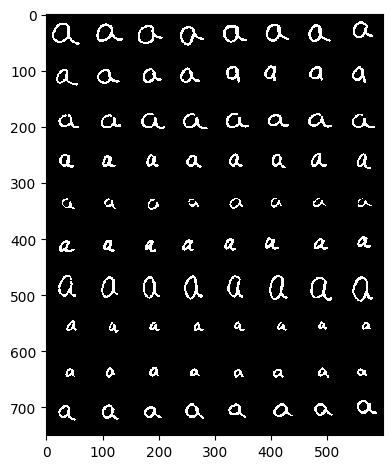

In [6]:
def binarize(th : int, img):
    img_binary = (img < th).astype(np.double)
    return img_binary
th = 200
bina = binarize(th, aimg)
bind = binarize(th, dimg)
binm = binarize(th, mimg)
binn = binarize(th, nimg)
bino = binarize(th, oimg)
binp = binarize(th, pimg)
binq = binarize(th, qimg)
binr = binarize(th, rimg)
binu = binarize(th, uimg)
binw = binarize(th, wimg)

# io.imshow(bina)

io.imshow(bina)
io.show()

In [ ]:
a_label = label(bina, background=0)
d_label = label(bind, background=0)
m_label = label(binm, background=0)
n_label = label(binn, background=0)
o_label = label(bino, background=0)
p_label = label(binp, background=0)
q_label = label(binq, background=0)
r_label = label(binr, background=0)
u_label = label(binu, background=0)
w_label = label(binw, background=0)


io.imshow(a_label) 
print(np.amax(a_label))
plt.title('Labeled Image') 
io.show() 

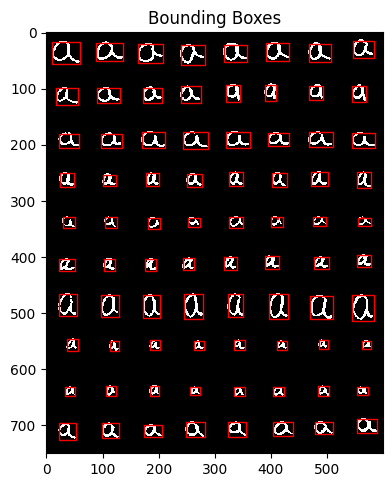

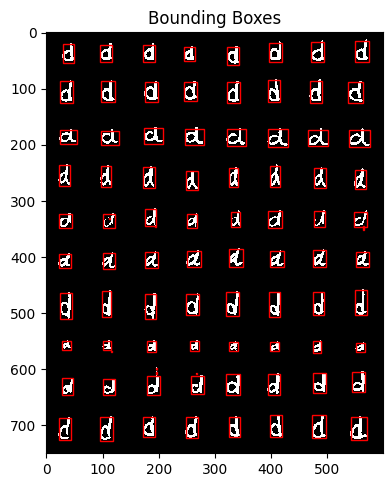

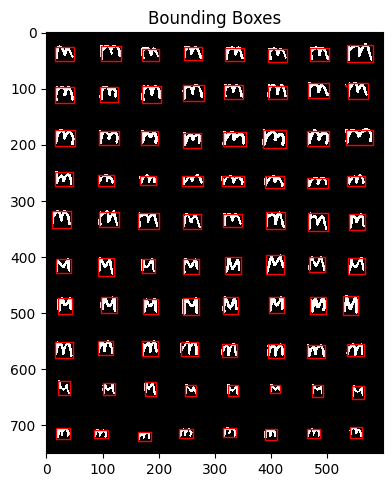

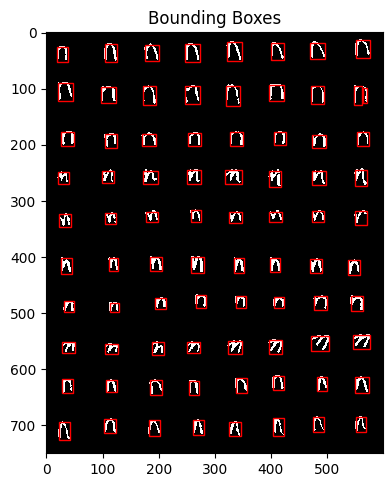

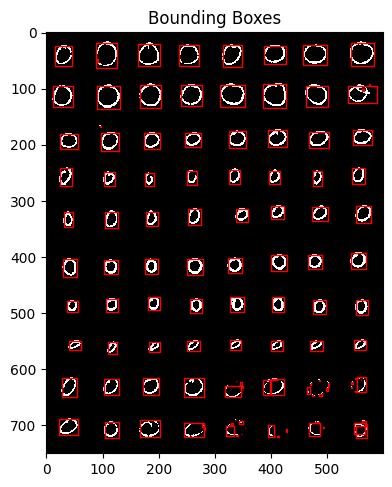

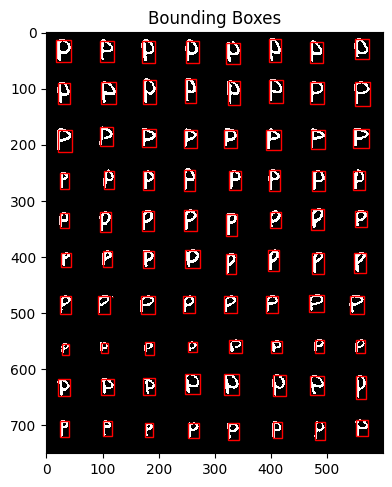

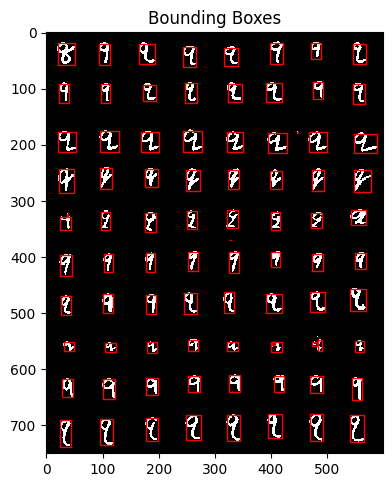

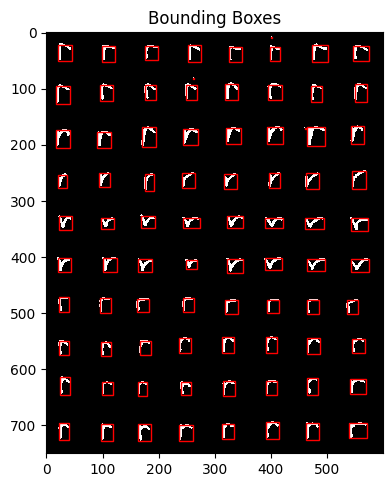

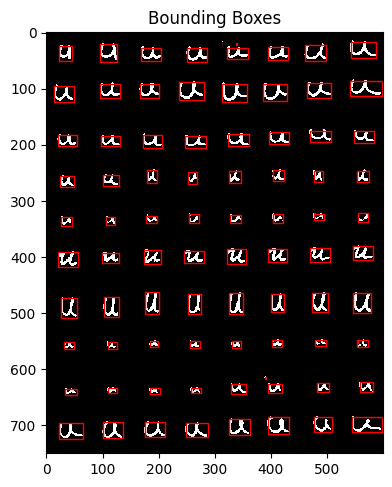

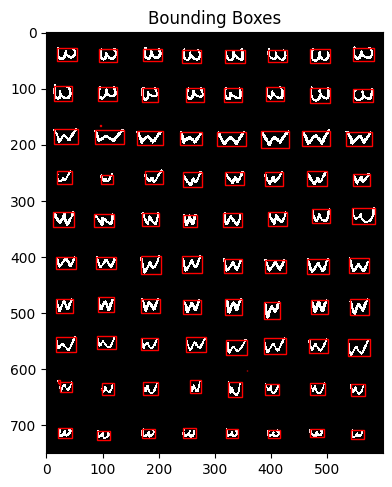

[[ 4.18795118e-01  3.44351389e-03  8.12850164e-03 ...  1.48588360e-08
   2.26079952e-06  2.37116499e-08]
 [ 6.00176130e-01  2.76809992e-02  6.30680121e-02 ...  2.41907533e-05
   3.51771989e-04  6.88252817e-06]
 [ 5.21957852e-01  2.39723381e-02  4.79656569e-02 ...  1.33053848e-05
   2.12899821e-04  7.67142195e-06]
 ...
 [ 3.56548262e-01  4.51988316e-02  3.38941567e-03 ... -1.04787304e-06
  -1.51307409e-04  8.41439060e-07]
 [ 3.68527029e-01  4.30984386e-02  7.64116617e-03 ... -5.56249185e-06
  -1.93418353e-04 -4.01636770e-06]
 [ 3.30878943e-01  4.03501367e-02  2.92565403e-03 ...  1.12023853e-07
  -6.62661707e-06 -1.05924045e-06]]


In [8]:

Features = []
def boundingBox(label, binary):
    regions = regionprops(label) 
    io.imshow(binary) 
    ax = plt.gca() 
    for props in regions: 
        minr, minc, maxr, maxc = props.bbox 
        ax.add_patch(Rectangle((minc,  minr),  maxc  -  minc,  maxr  -  minr, fill=False, edgecolor='red', linewidth=1))
        roi = binary[minr:maxr, minc:maxc] 
        m = moments(roi) 
        cc = m[0, 1] / m[0, 0] 
        cr = m[1, 0] / m[0, 0] 
        mu = moments_central(roi, center=(cr, cc)) 
        nu = moments_normalized(mu) 
        hu = moments_hu(nu)
        Features.append(hu)
    ax.set_title('Bounding Boxes') 
    io.show()
boundingBox(a_label, bina)
boundingBox(d_label, bind)
boundingBox(m_label, binm)
boundingBox(n_label, binn)
boundingBox(o_label, bino)
boundingBox(p_label, binp)
boundingBox(q_label, binq)
boundingBox(r_label, binr)
boundingBox(u_label, binu)
boundingBox(w_label, binw)
# boundingBox(test_label, bintest)
# print(np.array(Features).shape)
Features = np.array(Features)
print(Features)

In [9]:
labelarr = []
def appendToLabelArr(label, c):
    for i in range(np.amax(label)):
        labelarr.append(c)
appendToLabelArr(a_label, 'a')
appendToLabelArr(d_label, 'd')
appendToLabelArr(m_label, 'm')
appendToLabelArr(n_label, 'n')
appendToLabelArr(o_label, 'o')
appendToLabelArr(p_label, 'p')
appendToLabelArr(q_label, 'q')
appendToLabelArr(r_label, 'r')
appendToLabelArr(u_label, 'u')
appendToLabelArr(w_label, 'w')
print(len(labelarr))
print(labelarr)

891
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 

Labelarr is created inorder to map indices to their actual letter values

In [10]:
def normalize(features):
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    normalizedFeatures = Features - mean
    normalizedFeatures = normalizedFeatures / std
    return normalizedFeatures

normalizedFeatures = normalize(Features)
print(normalizedFeatures)

    

[[ 0.23979159 -0.5301036  -0.16535871 ...  0.02412557 -0.00807351
  -0.01348999]
 [ 1.44614074 -0.21902088  0.65693002 ...  0.04103998  0.08370885
  -0.01248495]
 [ 0.92591786 -0.26662072  0.43089057 ...  0.03342415  0.04724073
  -0.01236935]
 ...
 [-0.17420677  0.0058166  -0.23628939 ...  0.02338204 -0.04840084
  -0.01337017]
 [-0.09453705 -0.02114148 -0.17265274 ...  0.02022343 -0.05945926
  -0.014082  ]
 [-0.34493116 -0.05641532 -0.24323059 ...  0.02419355 -0.01040736
  -0.01364868]]


In [ ]:
D = cdist(normalizedFeatures, normalizedFeatures) 
io.imshow(D) 
plt.title('Distance Matrix') 
io.show() 

In [12]:
D_index = np.argsort(D, axis=1)
  
# print(D_index)
print(D_index)

[[  0 803  33 ... 449 428 417]
 [  1  58   2 ... 449 428 417]
 [  2  17  51 ... 449 428 417]
 ...
 [888 524 400 ... 449 428 417]
 [889 179 477 ... 449 428 417]
 [890 580 251 ... 449 428 417]]


In [13]:
Ytrue = []
Ypred = []
c = np.ndarray.tolist(D_index)
for i in range(len(c)):
    Ytrue.append(labelarr[c[i][0]])
    Ypred.append(labelarr[c[i][1]])

In [ ]:
confM = confusion_matrix(Ytrue, Ypred)
io.imshow(confM) 
plt.title('Confusion Matrix') 
io.show() 

[[320, 348, 17, 46], [97, 119, 19, 41], [17, 49, 22, 46], [251, 280, 22, 48], [474, 507, 22, 43], [173, 195, 24, 44], [398, 423, 24, 43], [21, 22, 44, 45], [327, 346, 81, 119], [102, 121, 82, 117], [170, 190, 85, 118], [251, 269, 85, 118], [398, 417, 85, 117], [20, 42, 86, 117], [476, 495, 86, 120], [323, 352, 161, 193], [17, 48, 166, 195], [250, 279, 169, 193], [403, 426, 171, 194], [467, 501, 171, 196], [102, 127, 172, 198], [178, 202, 172, 192], [467, 494, 234, 269], [106, 128, 238, 269], [393, 418, 238, 270], [19, 42, 241, 267], [178, 201, 242, 269], [315, 342, 242, 270], [248, 268, 245, 273], [102, 135, 309, 349], [318, 355, 311, 347], [247, 288, 313, 350], [172, 208, 314, 352], [390, 425, 314, 348], [468, 499, 315, 350], [21, 50, 318, 356], [338, 341, 318, 320], [194, 195, 321, 322], [97, 121, 383, 392], [403, 428, 383, 416], [95, 96, 384, 385], [91, 93, 385, 388], [104, 106, 388, 393], [329, 346, 388, 421], [23, 48, 389, 422], [474, 498, 389, 424], [183, 202, 390, 423], [256, 27

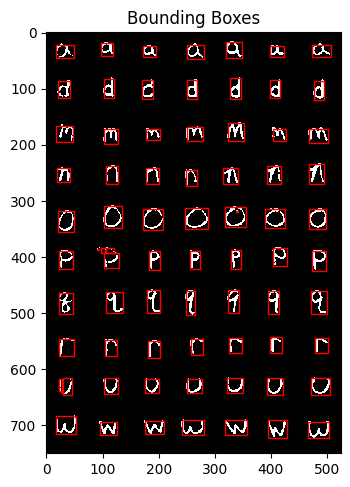

In [15]:
#Testing
testimg = io.imread("./images/test.bmp")
bintest = binarize(th, testimg)
test_label = label(bintest, background=0)
testFeatures = []
regions = regionprops(test_label) 
io.imshow(bintest) 
testBoundingBoxes = []
ax = plt.gca() 
for props in regions: 
    minr, minc, maxr, maxc = props.bbox 
    ax.add_patch(Rectangle((minc,  minr),  maxc  -  minc,  maxr  -  minr, fill=False, edgecolor='red', linewidth=1))
    roi = bintest[minr:maxr, minc:maxc]
    testBoundingBoxes.append([minc, maxc, minr, maxr])
    m = moments(roi) 
    cc = m[0, 1] / m[0, 0] 
    cr = m[1, 0] / m[0, 0] 
    mu = moments_central(roi, center=(cr, cc)) 
    nu = moments_normalized(mu) 
    hu = moments_hu(nu)
    testFeatures.append(hu)
ax.set_title('Bounding Boxes') 
print(testBoundingBoxes)

In [16]:
mean = np.mean(testFeatures, axis=0)
std = np.std(testFeatures, axis=0)
normalizedTestFeatures = testFeatures - mean
normalizedTestFeatures = normalizedTestFeatures / std
print(normalizedTestFeatures.shape)

(80, 7)


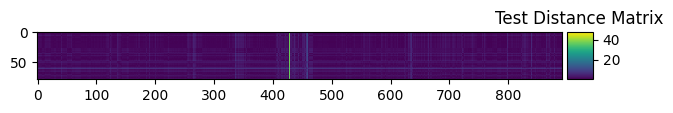

In [19]:
TD = cdist(normalizedTestFeatures, normalizedFeatures) 
io.imshow(TD) 
plt.title('Test Distance Matrix') 
io.show() 

In [21]:
pkl_file = open('./test_gt_py3.pkl', 'rb') 
mydict = pickle.load(pkl_file) 
pkl_file.close() 
classes = mydict[b'classes'] 
locations = mydict[b'locations'] 
print(classes)
print(locations)

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'q' 'q' 'q' 'q' 'q' 'q' 'q' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
[[ 30  32]
 [108  30]
 [187  34]
 [262  36]
 [333  34]
 [485  32]
 [408  31]
 [ 26 108]
 [111 107]
 [185 107]
 [263 110]
 [338 111]
 [410 107]
 [486 110]
 [ 35 179]
 [117 185]
 [187 185]
 [261 181]
 [336 182]
 [413 182]
 [483 184]
 [ 34 255]
 [116 254]
 [186 259]
 [258 255]
 [330 259]
 [406 256]
 [484 250]
 [ 34 341]
 [118 331]
 [196 335]
 [272 335]
 [337 328]
 [411 331]
 [483 331]
 [ 33 402]
 [115 405]
 [194 399]
 [266 400]
 [340 397]
 [415 401]
 [488 404]
 [ 32 479]
 [116 475]
 [188 474]
 [257 473]
 [334 475]
 [408 476]
 [485 477]
 [ 32 561]
 [117 563]
 [195 561]
 [268 562]
 [336 559]
 [407 558]
 [487 553]
 [ 33 630]
 [114 628]
 [190 628]
 [268 632]
 [335 630]
 [407 632]
 [496 629]
 [ 37 703]
 [109 707]


In [22]:
TD_index = np.argsort(TD, axis=1)
  
# print(D_index)
print(TD_index)
print(list(locations))

[[397 399 398 ... 449 428 417]
 [582 781 226 ... 449 428 417]
 [379 397 369 ... 449 428 417]
 ...
 [790 571 888 ... 449 428 417]
 [771 767 402 ... 449 428 417]
 [652 638 639 ... 449 428 417]]
[array([30, 32], dtype=uint16), array([108,  30], dtype=uint16), array([187,  34], dtype=uint16), array([262,  36], dtype=uint16), array([333,  34], dtype=uint16), array([485,  32], dtype=uint16), array([408,  31], dtype=uint16), array([ 26, 108], dtype=uint16), array([111, 107], dtype=uint16), array([185, 107], dtype=uint16), array([263, 110], dtype=uint16), array([338, 111], dtype=uint16), array([410, 107], dtype=uint16), array([486, 110], dtype=uint16), array([ 35, 179], dtype=uint16), array([117, 185], dtype=uint16), array([187, 185], dtype=uint16), array([261, 181], dtype=uint16), array([336, 182], dtype=uint16), array([413, 182], dtype=uint16), array([483, 184], dtype=uint16), array([ 34, 255], dtype=uint16), array([116, 254], dtype=uint16), array([186, 259], dtype=uint16), array([258, 255],

In [23]:
testYtrue = []
testYpred = []
k = np.ndarray.tolist(TD_index)
# print(k)
for i in range(len(k)):
    for arr in locations:
        if(arr[0]<testBoundingBoxes[i][1] and arr[0]>testBoundingBoxes[i][0] and arr[1]<testBoundingBoxes[i][3] and arr[1]>testBoundingBoxes[i][2]):
            testYpred.append(labelarr[k[i][0]])
            break
# print(testYtrue)
print(testYpred)
print(list(classes))

['o', 'q', 'o', 'a', 'o', 'u', 'q', 'q', 'p', 'p', 'u', 'o', 'u', 'o', 'u', 'o', 'o', 'u', 'u', 'o', 'u', 'u', 'u', 'u', 'o', 'n', 'o', 'n', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'u', 'p', 'd', 'o', 'o', 'q', 'w', 'r', 'd', 'd', 'r', 'r', 'u', 'o', 'r', 'q', 'r', 'r', 'r', 'o', 'r', 'r', 'r', 'r', 'r', 'n', 'w', 'o', 'r', 'r', 'r', 'w', 'u', 'u', 'r']
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


In [ ]:
confM2 = confusion_matrix(list(classes), testYpred)
io.imshow(confM2) 
plt.title('Confusion Matrix') 
io.show() 

In [25]:
count = 0
for i in range(len(confM2)):
    if(confM2[i][i] == 0):
        count += 1
print(count/len(confM2))

0.45454545454545453


Base Recognition is 45.5 percent

Additional ideas for improvement include:
 - Not using hu moments but instead using normalized moments. Because hu moments are rotational invariants which will cause letters like u and n to get mixed up or d and p
 - Using a more tailored threshold might also be a better approach
